In [1]:
import json,csv
import pandas as pd

pd.set_option('display.max_columns', 50)
# 生データ読み込み
df_raw = pd.read_csv("data\\raw_ym\\crime-db.csv")
# 町丁字数調査
print(df_raw['KEY_CODE'].nunique())
# データの概要
df_raw.describe()

3138


,KEY_CODE,year,month,凶悪犯_強盗,凶悪犯_その他,粗暴犯_凶器準備集合,粗暴犯_暴行,粗暴犯_傷害,粗暴犯_脅迫,粗暴犯_恐喝,侵入窃盗_金庫破り,侵入窃盗_学校荒し,侵入窃盗_事務所荒し,侵入窃盗_出店荒し,侵入窃盗_空き巣,侵入窃盗_忍込み,侵入窃盗_居空き,侵入窃盗_その他,非侵入窃盗_自動車盗,非侵入窃盗_オートバイ盗,非侵入窃盗_自転車盗,非侵入窃盗_車上ねらい,非侵入窃盗_自販機ねらい,非侵入窃盗_工事場ねらい,非侵入窃盗_すり,非侵入窃盗_ひったくり,非侵入窃盗_置引き,非侵入窃盗_万引き,非侵入窃盗_その他,その他_詐欺,その他_占有離脱物横領,その他_その他知能犯,その他_賭博,その他_その他刑法犯
count,1.771310e+05,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.00000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000,177131.000000
mean,1.228312e+10,2015.954932,6.563662,0.009168,0.007548,0.000011,0.109665,0.072816,0.011472,0.006622,0.00459,0.002078,0.010760,0.025947,0.045080,0.008999,0.003822,0.015937,0.004437,0.039016,0.971501,0.086309,0.010930,0.013978,0.046519,0.010625,0.044063,0.314135,0.434481,0.161095,0.103974,0.017823,0.000536,0.344700
std,3.176220e+09,1.392890,3.351592,0.101785,0.090630,0.003360,0.462339,0.336231,0.109212,0.084449,0.07336,0.083373,0.139389,0.273325,0.248419,0.113047,0.064566,0.175087,0.069131,0.213703,1.586296,0.320744,0.115154,0.126208,0.386680,0.107475,0.343131,1.641773,1.298794,0.503127,0.374602,0.184396,0.036575,0.763137
min,1.310101e+08,2014.000000,1.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.00000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-2.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,1.310701e+10,2015.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.311204e+10,2016.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.312001e+10,2017.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.312305e+10,2018.000000,12.000000,10.000000,5.000000,1.000000,22.000000,20.000000,4.000000,3.000000,5.00000,23.000000,18.000000,65.000000,16.000000,12.000000,6.000000,34.000000,3.000000,7.000000,58.000000,11.000000,9.000000,3.000000,29.000000,5.000000,23.000000,211.000000,62.000000,52.000000,11.000000,22.000000,8.000000,29.000000


In [2]:
from datetime import datetime
# 窃盗犯罪及び情報列を抽出
df_thief = df_raw.loc[:,['KEY_CODE', 'year', 'month', '侵入窃盗_空き巣','非侵入窃盗_自転車盗','非侵入窃盗_万引き']]
df_thief.to_csv('thief.csv')

In [24]:
# 手口別発生件数
print(df_thief['侵入窃盗_空き巣'].sum())
print(df_thief['非侵入窃盗_自転車盗'].sum())
print(df_thief['非侵入窃盗_万引き'].sum())

7985
172083
55643


In [25]:
from datetime import datetime
# 年月でソート
df_thief_sorted = df_thief.sort_values(by=["KEY_CODE", "year", "month"], ascending=True)
df_thief_sorted.to_csv('thief-sorted.csv')

# 年月列の結合
def parse(x):
    return datetime.strptime(x, '%Y %m')
df_thief_dated = pd.read_csv('thief-sorted.csv',  parse_dates = [['year', 'month']], date_parser=parse)
df_thief_dated.drop('Unnamed: 0', axis=1, inplace=True)
# 町丁字でグルーピング
df_thief_dated = df_thief_dated.groupby(['KEY_CODE', 'year_month']).sum()
# カラム名をわかりやすい形に変換
df_thief_dated.columns = ['空き巣', '自転車盗', '万引き']
df_thief_dated.head()

空き巣  自転車盗  万引き
KEY_CODE  year_month                
131010070 2014-04-01    0     0    0
          2014-05-01    0     0    0
          2014-06-01    0     0    0
          2014-07-01    0     0    0
          2014-08-01    0     0    0

In [26]:
# 失われた過去を虚しさで埋める…（逃げる
unique_key_code = df_thief_dated.index.unique(level='KEY_CODE')
date_range = pd.DatetimeIndex(
    start=datetime(2014, 1, 1), 
    end=datetime(2018,11 ,1), 
    freq='MS'
)

key_code_date_index = pd.MultiIndex.from_product(
    iterables=[unique_key_code, date_range],
    names=['key_code', 'year_month']
)

df_thief_db = df_thief_dated.reindex(key_code_date_index, fill_value = 0)
df_thief_db.to_csv('thief-db.csv')
df_thief_db.head()

# 総件数再チェック
print(df_thief_db['空き巣'].sum())
print(df_thief_db['自転車盗'].sum())
print(df_thief_db['万引き'].sum())

7985
172083
55643


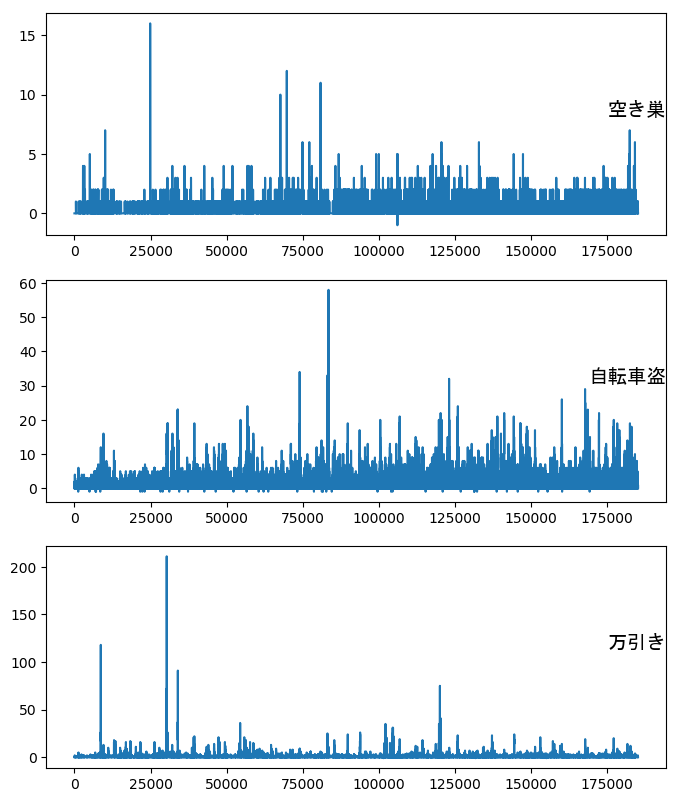

In [28]:
from pandas import read_csv
from matplotlib import pyplot
from matplotlib.font_manager import FontProperties

fp = FontProperties(fname=r'C:\WINDOWS\Fonts\msgothic.ttc', size=14)

# 手口別に抽出
dataset = read_csv('data\\raw_thief\\thief-db.csv', header=0, index_col=[0, 1])
dataset_aki = dataset.loc[:,['空き巣']]
dataset_aki.to_csv('thief-akisu.csv')

dataset_bicycle = dataset.loc[:,['自転車盗']]
dataset_bicycle.to_csv('thief-bicycle.csv')

dataset_manbiki = dataset.loc[:,['万引き']]
dataset_manbiki.to_csv('thief-manbiki.csv')

values = dataset.values

# プロットしてみる
groups = [0, 1, 2]
i = 1

pyplot.figure(figsize=(8, 10), dpi=100)
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right', fontproperties=fp)
    i += 1
pyplot.show()